In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Dataset & Libraries**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings 
import datetime
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from plotly.subplots import make_subplots

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/US_weather_events/WeatherEvents_Jan2016-Dec2020.csv')

# **Data Preprocessing & Visualizaion**

Text(0, 0.5, '')

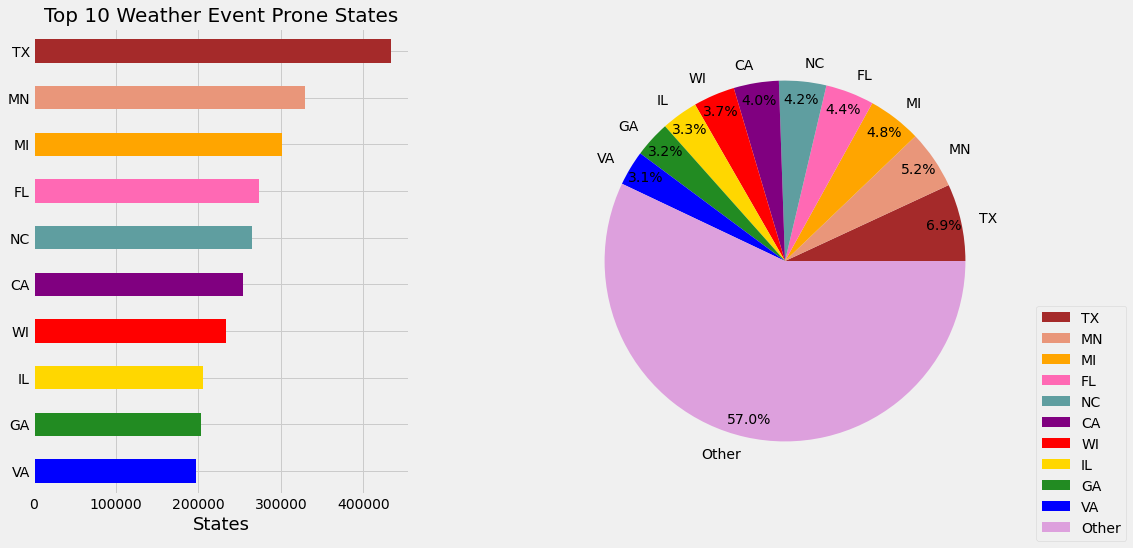

In [ ]:
weather_events=data
plt.style.use('fivethirtyeight')

fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
weather_events.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Weather Event Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=weather_events['State'].value_counts()
groups=list(weather_events['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

In [ ]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
data['End']=pd.to_datetime(data['EndTime(UTC)'], format=datetimeFormat)
data['Start']=pd.to_datetime(data['StartTime(UTC)'], format=datetimeFormat)
data['Duration']=data['End']-data['Start']
data['Duration'] = data['Duration'].dt.total_seconds()
data['Duration'] = data['Duration']/(60*60)  #in hours
data = data[(data['Duration']< 30*24) & (data['Duration'] != 0)] #removes obvious wrong data
data.head(3)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,End,Start,Duration
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-07 00:34:00,2016-01-06 23:14:00,1.333333
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-07 04:54:00,2016-01-07 04:14:00,0.666667
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-07 15:34:00,2016-01-07 05:54:00,9.666667


In [ ]:
df=data

In [ ]:
df2 = df.groupby(['AirportCode','City','State', 'LocationLat', 'LocationLng','Type']).agg({'Duration':['sum']}).reset_index()
df2.columns=pd.MultiIndex.from_tuples(( ("AirportCode", " "),("City", " "),("State", " "), ("LocationLat", " "),("LocationLng", " "), ("Type", " "), ("Duration", " ") ))
df2.columns = df2.columns.get_level_values(0)
df2['Duration'] = df2['Duration']/(24*4*3.65) #yearly percentage  
df2 = df2.sort_values(by='Duration')
#df2.shape
df2

,AirportCode,City,State,LocationLat,LocationLng,Type,Duration
8570,KOWB,Owensboro,KY,37.7388,-87.1668,Hail,0.000048
6729,KLSF,Fort Benning,GA,32.3239,-84.9826,Hail,0.000048
10139,KSHR,Sheridan,WY,44.7603,-106.9741,Hail,0.000048
8919,KPLU,Puyallup,WA,47.1039,-122.2872,Hail,0.000048
8849,KPIA,Peoria,IL,40.6675,-89.6839,Storm,0.000095
...,...,...,...,...,...,...,...
9915,KSBD,San Bernardino,CA,34.0903,-117.2471,Fog,22.445443
8056,KNRS,Imperial Beach,CA,32.5630,-117.1109,Cold,24.517123
10598,KSXT,Wolf Creek,OR,42.6000,-123.3656,Fog,25.214326
7785,KMWN,Sargents,NH,44.2708,-71.3035,Fog,25.338994


In [ ]:
df_flat = df2.pivot( index='AirportCode',columns='Type', values=['Duration']).reset_index().fillna(0)
df_flat.columns=pd.MultiIndex.from_tuples(((' ', 'AirportCode'),(' ', 'Cold'),(' ', 'Fog'),(' ',  'Hail'),(' ', 'Precipitation'),(' ', 'Rain'),(' ', 'Snow'),(' ', 'Storm')))
df_flat.columns = df_flat.columns.get_level_values(1)

uniqueKey = df2[['AirportCode', 'City','State', 'LocationLat', 'LocationLng']].sort_values(by='AirportCode').drop_duplicates()
weather = pd.merge(df_flat, uniqueKey, how='inner', on='AirportCode')
#weather

In [ ]:
fig_rain = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Fog",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense', 
                      range_color = [0,16],
                      scope="usa",
                      title ='fig 4. City wide rainy days percentage each year from 2016 to 2019')
#fig_rain.update_layout(height=750, width=1000)
fig_rain.show()

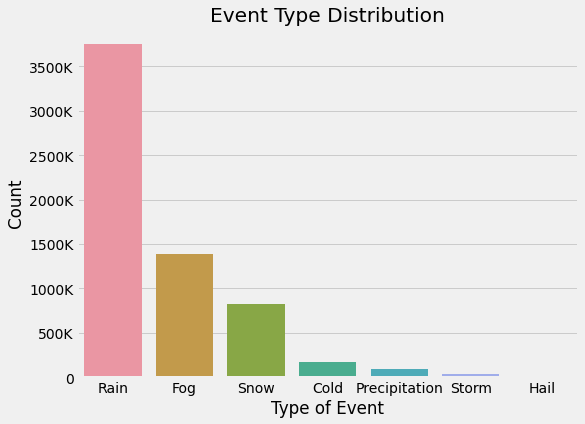

In [ ]:
f,ax=plt.subplots(1,1,figsize=(8,6))
sns.countplot('Type',data=data,order=data['Type'].value_counts().index)
ax.set_title('Event Type Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Type of Event')
ax.set_yticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000])
ax.set_yticklabels(labels=['0','500K','1000K','1500K','2000K','2500K','3000K','3500K'])
plt.show()